In [1]:
!pip install matplotlib

Unit Price vs Star Rating with sale status

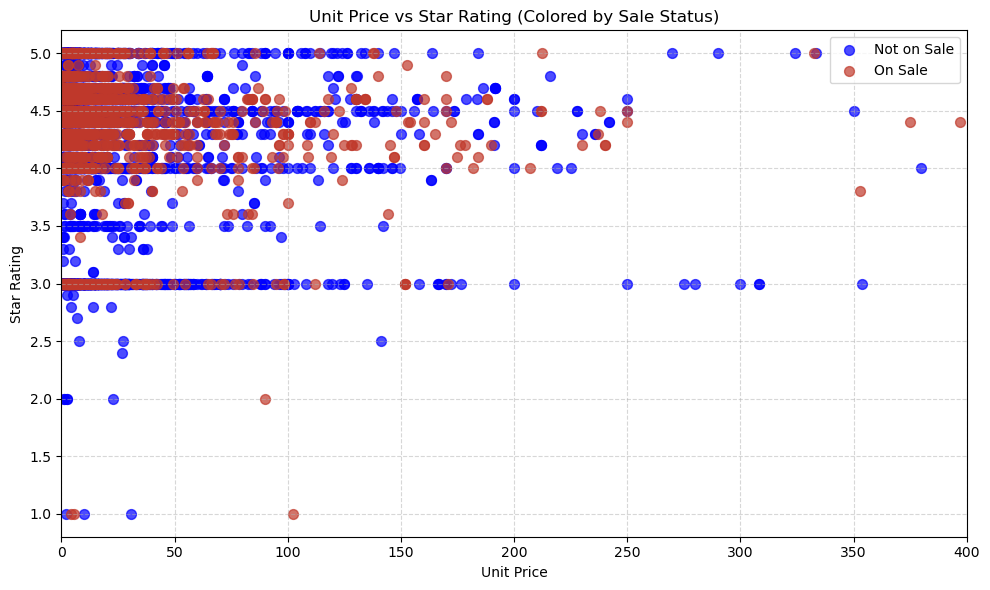

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('makeup_data.csv', encoding='latin1')

df = df.dropna(subset=['unit_price', 'star_rating', 'is_on_sale'])

df['sale_status'] = df['is_on_sale'].map({0: 'Not on Sale', 1: 'On Sale'})

plt.figure(figsize=(10, 6))
colors = {
    'Not on Sale': 'blue',     
    'On Sale': '#c0392b'        
}

for status in df['sale_status'].unique():
    subset = df[df['sale_status'] == status]
    plt.scatter(subset['unit_price'], subset['star_rating'], 
                label=status, alpha=0.7, s=50, c=colors[status])

plt.xlabel('Unit Price')
plt.ylabel('Star Rating')
plt.title('Unit Price vs Star Rating (Colored by Sale Status)')
plt.legend()

plt.xlim(0, 400)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Current Price vs Review Counts by Platform (Facet Scatter Plot by Platform）)

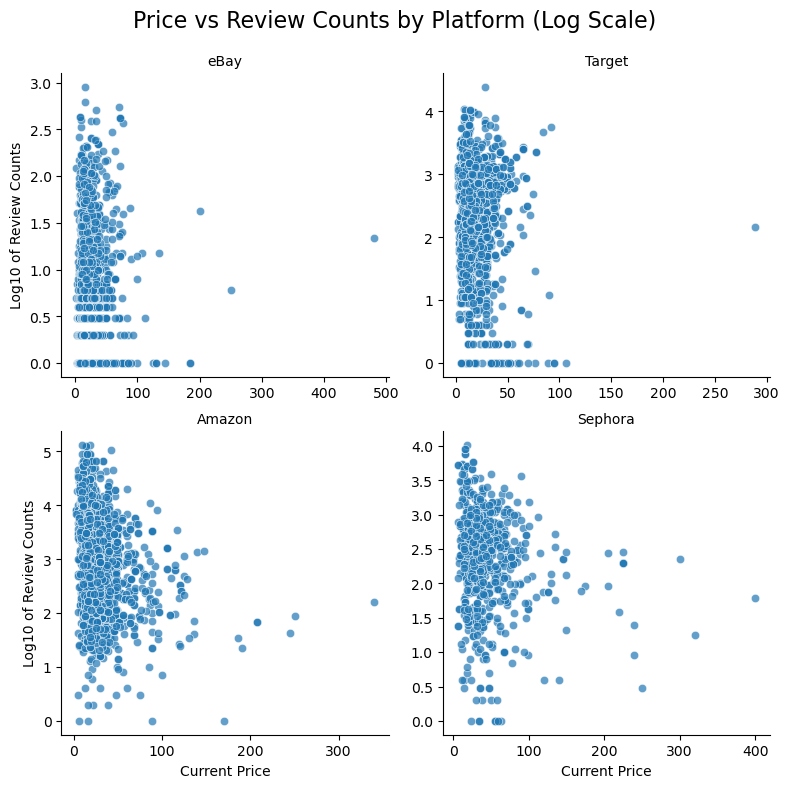

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('makeup_data.csv', encoding='latin1')  # encoding

df = df.dropna(subset=['platform', 'current_price', 'review_counts'])

df['review_counts'] = df['review_counts'].replace(0, np.nan)
df['log_review_counts'] = np.log10(df['review_counts'])

g = sns.FacetGrid(df, col='platform', col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='current_price', y='log_review_counts', alpha=0.7)

g.set_axis_labels('Current Price', 'Log10 of Review Counts')
g.set_titles(col_template="{col_name}")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price vs Review Counts by Platform (Log Scale)', fontsize=16)

plt.show()

Unit Price Distribution by Product Category and Platform

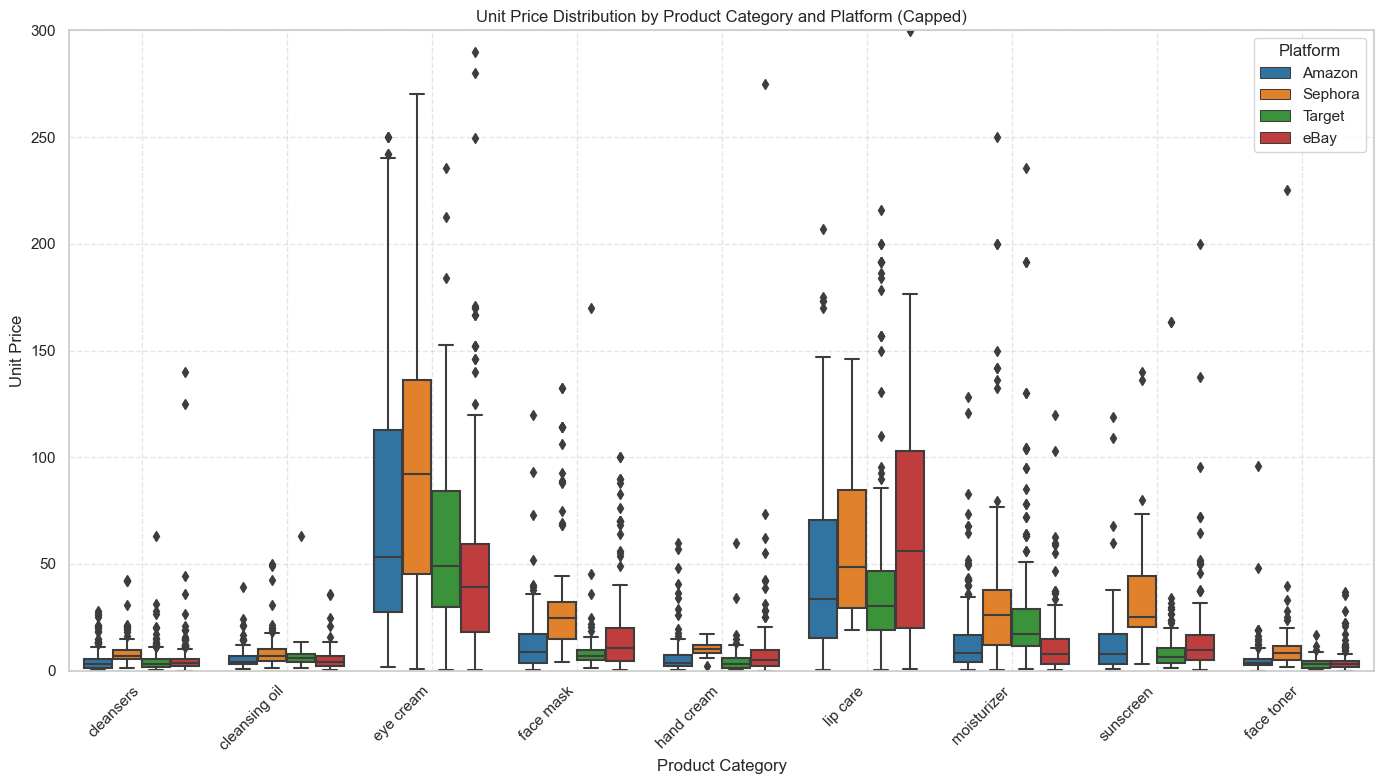

In [16]:
plt.figure(figsize=(14, 8))
sns.set(style='whitegrid')

sns.boxplot(
    data=df,
    x='product_category',
    y='unit_price',
    hue='platform',
    hue_order=platform_order,
    palette=platform_palette
)

plt.ylim(0, 300)  
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.title('Unit Price Distribution by Product Category and Platform (Capped)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Number of Products per Category per Platform (Grouped Bar Plot)

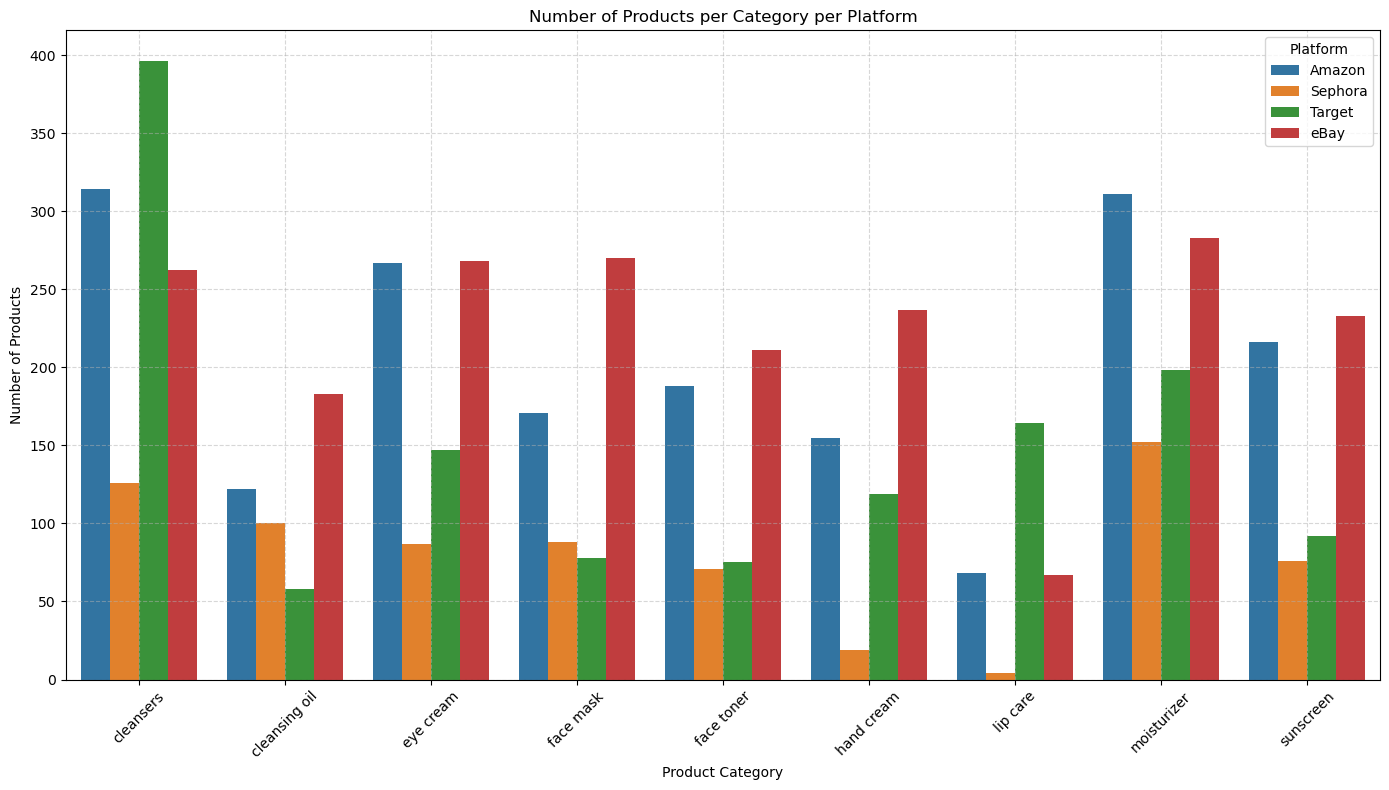

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('makeup_data.csv', encoding='latin1')
df = df.dropna(subset=['product_category', 'platform'])

count_df = df.groupby(['product_category', 'platform']).size().reset_index(name='counts')

plt.figure(figsize=(14, 8))
sns.barplot(data=count_df, x='product_category', y='counts', hue='platform')

plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Number of Products per Category per Platform')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Unit Price vs Star Rating with Regression Line

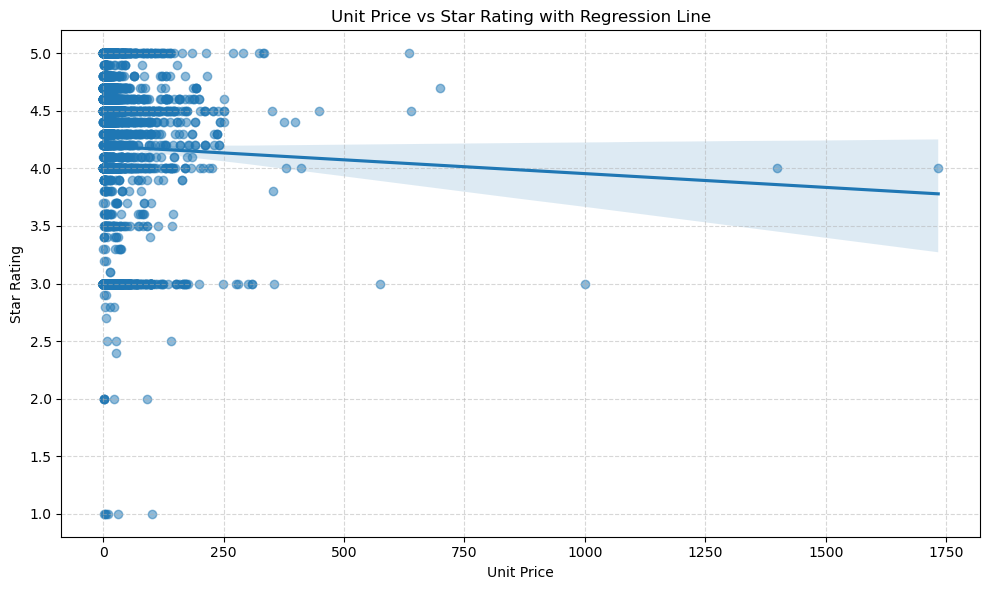

In [7]:
df = df.dropna(subset=['unit_price', 'star_rating'])

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='unit_price', y='star_rating', scatter_kws={'alpha':0.5})

plt.xlabel('Unit Price')
plt.ylabel('Star Rating')
plt.title('Unit Price vs Star Rating with Regression Line')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Unit Price vs Star Rating by Platform

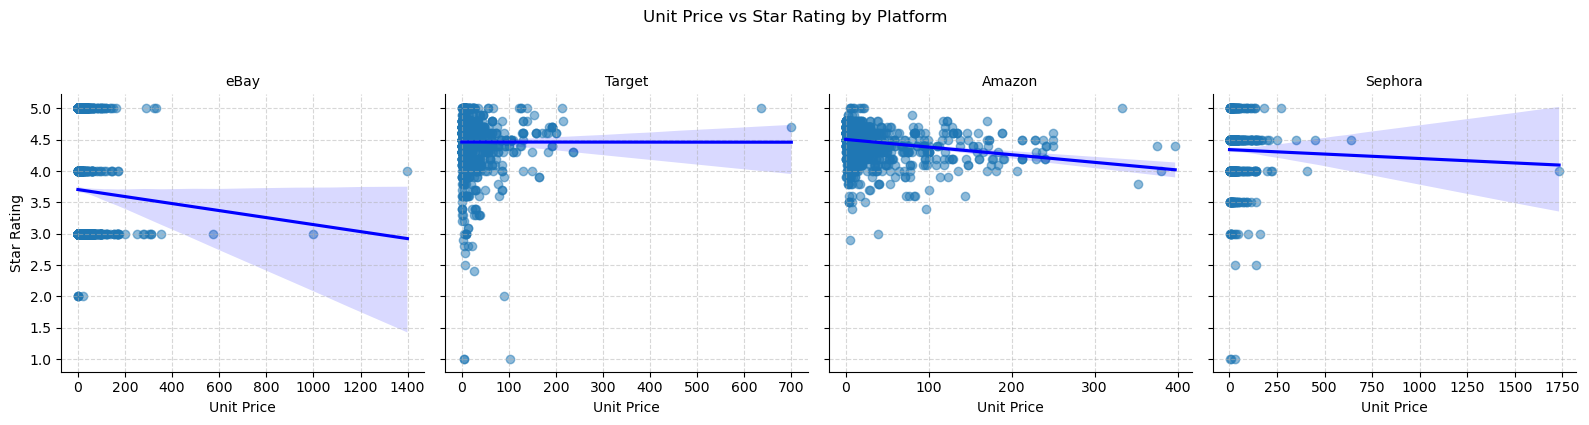

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('makeup_data.csv', encoding='latin1')

df = df.dropna(subset=['unit_price', 'star_rating', 'platform'])

g = sns.lmplot(
    data=df,
    x='unit_price', 
    y='star_rating', 
    col='platform',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'blue'},
    height=4,
    aspect=1,
    facet_kws={'sharex': False, 'sharey': True}
)

g.set_axis_labels('Unit Price', 'Star Rating')
g.set_titles(col_template="{col_name}")

g.fig.suptitle('Unit Price vs Star Rating by Platform', y=1.05)

for ax in g.axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Mean and Median Unit Price per Category per Platform

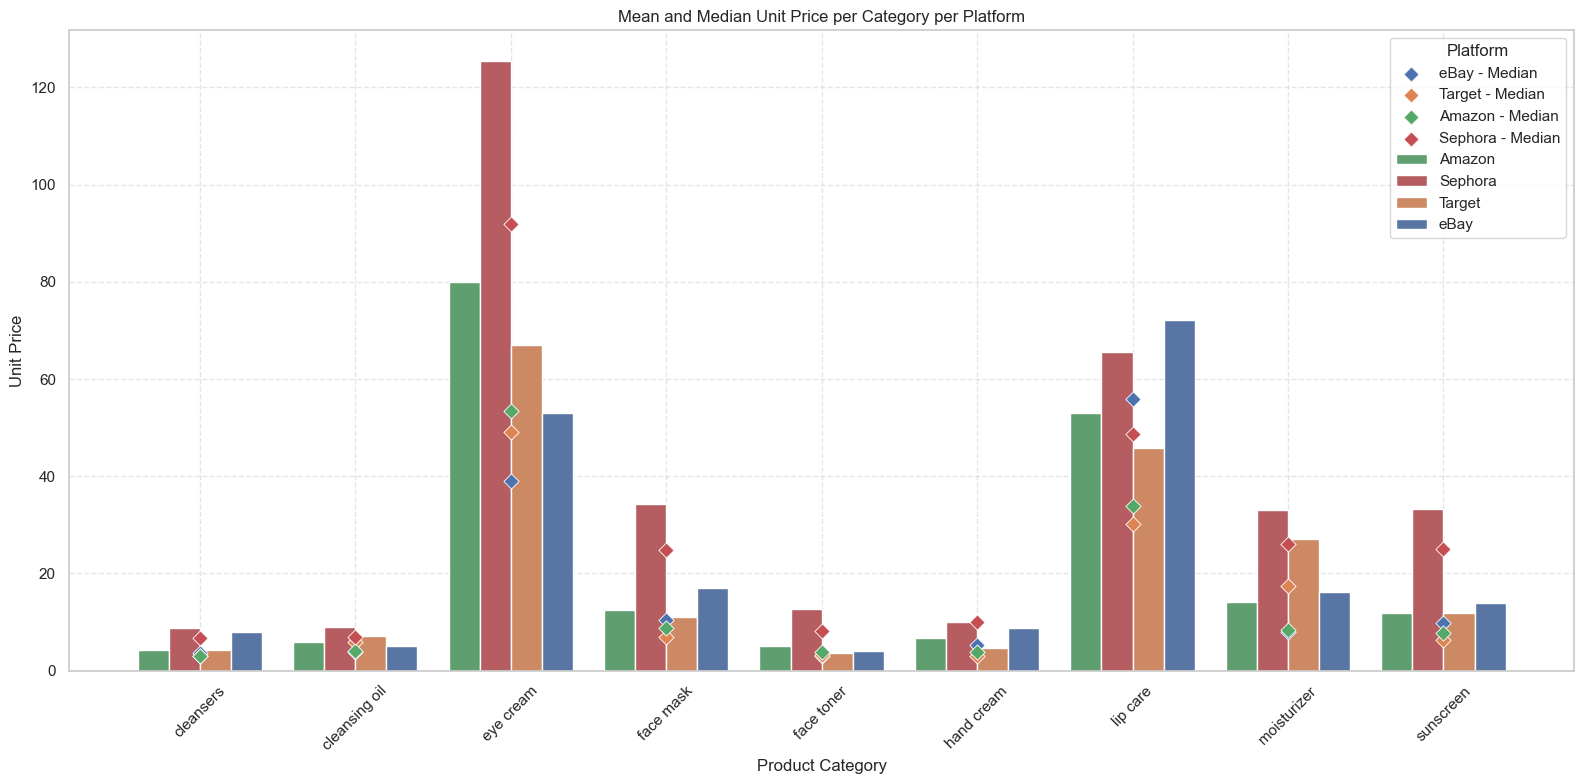

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('makeup_data.csv', encoding='latin1')
df = df.dropna(subset=['product_category', 'platform', 'unit_price'])

mean_price = df.groupby(['product_category', 'platform'])['unit_price'].mean().reset_index()
mean_price['stat'] = 'Mean'

median_price = df.groupby(['product_category', 'platform'])['unit_price'].median().reset_index()
median_price['stat'] = 'Median'

combined = pd.concat([mean_price, median_price], ignore_index=True)

plt.figure(figsize=(16, 8))

sns.barplot(data=combined, x='product_category', y='unit_price', hue='platform', dodge=True, ci=None)

for platform in combined['platform'].unique():
    subset = combined[(combined['platform'] == platform) & (combined['stat'] == 'Median')]
    sns.scatterplot(data=subset, x='product_category', y='unit_price', marker='D', s=60, label=f'{platform} - Median', legend=False)

plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.title('Mean and Median Unit Price per Category per Platform')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Unit Price Distribution by Free Shipping Status Across Platforms

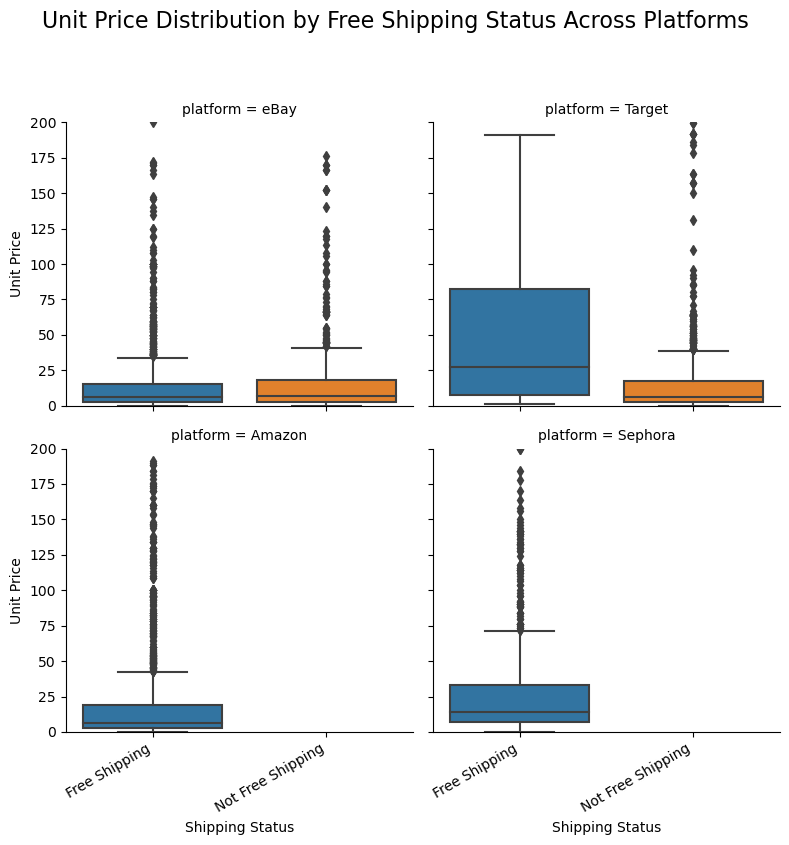

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('makeup_data.csv', encoding='latin1')
df = df.dropna(subset=['is_free_shipping', 'unit_price', 'platform'])

df['free_shipping_status'] = df['is_free_shipping'].map({0: 'Not Free Shipping', 1: 'Free Shipping'})

g = sns.catplot(
    data=df, 
    x='free_shipping_status', 
    y='unit_price', 
    col='platform',
    kind='box',
    col_wrap=2,
    height=4,
    aspect=1
)

g.set(ylim=(0, 200))
g.fig.suptitle('Unit Price Distribution by Free Shipping Status Across Platforms', fontsize=16, y=1.05)
g.set_axis_labels("Shipping Status", "Unit Price")

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()



Star-rating by 3-day delivery status

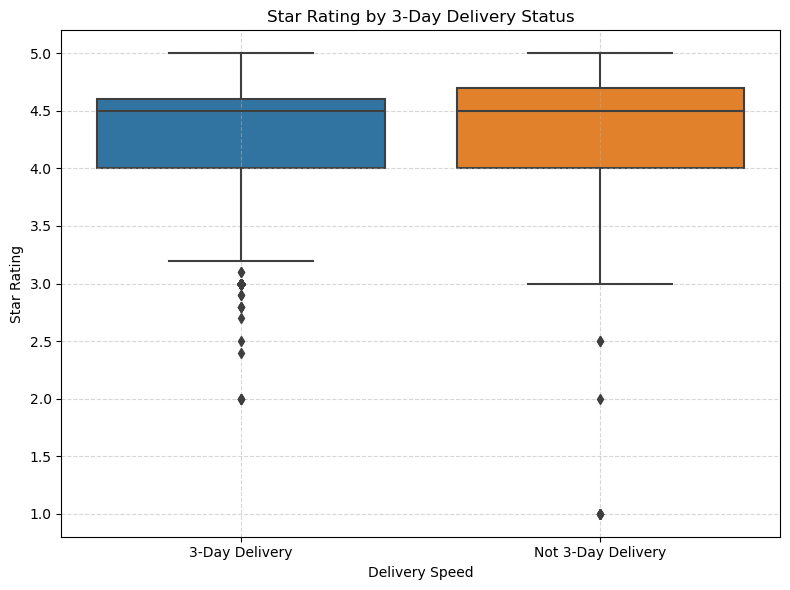

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('makeup_data.csv', encoding='latin1')
df = df.dropna(subset=['is_3day_delivery', 'star_rating'])

df['delivery_status'] = df['is_3day_delivery'].map({0: 'Not 3-Day Delivery', 1: '3-Day Delivery'})
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='delivery_status', y='star_rating')

plt.xlabel('Delivery Speed')
plt.ylabel('Star Rating')
plt.title('Star Rating by 3-Day Delivery Status')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Average Unit Price by Free Shipping and 3-Day Delivery Status

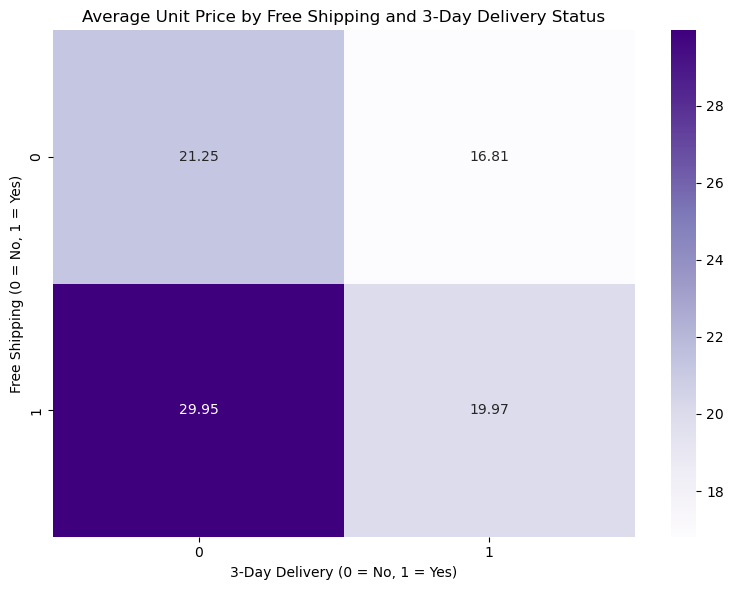

In [3]:
df = df.dropna(subset=['is_free_shipping', 'is_3day_delivery', 'unit_price'])

df['shipping_delivery_combo'] = df['is_free_shipping'].astype(str) + '-' + df['is_3day_delivery'].astype(str)
pivot_table = df.pivot_table(index='is_free_shipping', columns='is_3day_delivery', values='unit_price', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('Average Unit Price by Free Shipping and 3-Day Delivery Status')
plt.xlabel('3-Day Delivery (0 = No, 1 = Yes)')
plt.ylabel('Free Shipping (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()